## Project Overview:Chicago Crime Analysis using SQL
This project explores crime trends in Chicago through SQL queries to uncover key patterns and insights. The analysis focuses on the number of arrests over the year and crime categories. By leveraging SQL within a Jupyter Notebook, the project demonstrates how structured queries can efficiently retrieve and analyze data.


## WorkFlow 
1. Install necessary libraries 
- pandas: For reading the Excel file.
- openpyxl: For working with .xlsx files.
- sqlalchemy: To manage the connection to the database.
- sqlite3: To create and manage an SQLite database.
- ipython-sql: To run SQL queries within the Jupyter notebook using %%sql magic commands.

2. Load the excel file into a dataframe
3. Create an SQLite database and load the DataFrame into it
4. Loading the sql extension in the notebook
5. Connect to the database
  

In [4]:
# Load the data and remove the first row and set the second row as the column names using skiprows=1
import pandas as pd

# Load the Excel file
file_path = r'C:\Users\ELITEBOOK 840 G3\OneDrive\Desktop\Chicago_Crime_SQL_Analsis\chicago_crime.xlsx' 
df = pd.read_excel(file_path, skiprows=1)

# Display the first few rows of the data
df.head()


,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,10266179,HY453689,2015-10-07 23:30:00,001XX N DEARBORN ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,OTHER,False,False,...,42.0,32.0,02,1175930.0,1900878.0,2015,2018-02-10 15:50:01,41.883375,-87.629428,"(41.883375237, -87.629427772)"
1,8898014,HV570248,2012-11-20 15:45:00,002XX N CLARK ST,0312,ROBBERY,ARMED:KNIFE/CUTTING INSTRUMENT,RESTAURANT,False,False,...,42.0,32.0,03,1175500.0,1901787.0,2012,2018-02-10 15:50:01,41.885879,-87.630979,"(41.885879253, -87.630979425)"
2,3401602,HK459747,2004-06-26 23:55:00,002XX S CANAL ST,031A,ROBBERY,ARMED: HANDGUN,OTHER RAILROAD PROP / TRAIN DEPOT,False,False,...,2.0,28.0,03,1173177.0,1899236.0,2004,2018-02-28 15:56:25,41.878931,-87.639586,"(41.878931004, -87.639585621)"
3,10045642,HY233179,2015-04-23 16:50:00,001XX N STATE ST,031A,ROBBERY,ARMED: HANDGUN,CTA PLATFORM,False,False,...,42.0,32.0,03,1176331.0,1901632.0,2015,2018-02-10 15:50:01,41.885435,-87.627933,"(41.88543522, -87.62793253)"
4,11348424,JB307694,2018-06-14 23:00:00,0000X E WACKER DR,0320,ROBBERY,STRONGARM - NO WEAPON,STREET,False,False,...,42.0,32.0,03,1176895.0,1902434.0,2018,2018-06-21 16:04:58,41.887623,-87.625837,"(41.88762321, -87.62583716)"


# Create an SQLite Database and Load the Data


In [5]:
import sqlite3

from sqlalchemy import create_engine

# Create an SQLite engine
engine = create_engine('sqlite:///chicago_crime.db')

# Load the DataFrame into the SQLite database
df.to_sql('chicago_crime', con=engine, index=False, if_exists='replace')

# Verify if the data was successfully loaded
pd.read_sql('SELECT * FROM chicago_crime LIMIT 5;', con=engine)


,unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
0,10266179,HY453689,2015-10-07 23:30:00.000000,001XX N DEARBORN ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,OTHER,0,0,...,42.0,32.0,02,1175930.0,1900878.0,2015,2018-02-10 15:50:01.000000,41.883375,-87.629428,"(41.883375237, -87.629427772)"
1,8898014,HV570248,2012-11-20 15:45:00.000000,002XX N CLARK ST,0312,ROBBERY,ARMED:KNIFE/CUTTING INSTRUMENT,RESTAURANT,0,0,...,42.0,32.0,03,1175500.0,1901787.0,2012,2018-02-10 15:50:01.000000,41.885879,-87.630979,"(41.885879253, -87.630979425)"
2,3401602,HK459747,2004-06-26 23:55:00.000000,002XX S CANAL ST,031A,ROBBERY,ARMED: HANDGUN,OTHER RAILROAD PROP / TRAIN DEPOT,0,0,...,2.0,28.0,03,1173177.0,1899236.0,2004,2018-02-28 15:56:25.000000,41.878931,-87.639586,"(41.878931004, -87.639585621)"
3,10045642,HY233179,2015-04-23 16:50:00.000000,001XX N STATE ST,031A,ROBBERY,ARMED: HANDGUN,CTA PLATFORM,0,0,...,42.0,32.0,03,1176331.0,1901632.0,2015,2018-02-10 15:50:01.000000,41.885435,-87.627933,"(41.88543522, -87.62793253)"
4,11348424,JB307694,2018-06-14 23:00:00.000000,0000X E WACKER DR,0320,ROBBERY,STRONGARM - NO WEAPON,STREET,0,0,...,42.0,32.0,03,1176895.0,1902434.0,2018,2018-06-21 16:04:58.000000,41.887623,-87.625837,"(41.88762321, -87.62583716)"


To run SQL queries directly in your Jupyter notebook, you need to set up the %%sql magic command by running %load_ext sql

In [6]:
# Loading the sql extension in the notebook
%load_ext sql


In [7]:
# Connect to the database
%sql sqlite:///chicago_crime.db

In [8]:
%%sql
SELECT * FROM chicago_crime LIMIT 20;


 * sqlite:///chicago_crime.db
Done.


unique_key,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location
10266179,HY453689,2015-10-07 23:30:00.000000,001XX N DEARBORN ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,OTHER,0,0,111,1,42.0,32.0,02,1175930.0,1900878.0,2015,2018-02-10 15:50:01.000000,41.883375237,-87.629427772,"(41.883375237, -87.629427772)"
8898014,HV570248,2012-11-20 15:45:00.000000,002XX N CLARK ST,0312,ROBBERY,ARMED:KNIFE/CUTTING INSTRUMENT,RESTAURANT,0,0,111,1,42.0,32.0,03,1175500.0,1901787.0,2012,2018-02-10 15:50:01.000000,41.885879253,-87.630979425,"(41.885879253, -87.630979425)"
3401602,HK459747,2004-06-26 23:55:00.000000,002XX S CANAL ST,031A,ROBBERY,ARMED: HANDGUN,OTHER RAILROAD PROP / TRAIN DEPOT,0,0,111,1,2.0,28.0,03,1173177.0,1899236.0,2004,2018-02-28 15:56:25.000000,41.878931004,-87.639585621,"(41.878931004, -87.639585621)"
10045642,HY233179,2015-04-23 16:50:00.000000,001XX N STATE ST,031A,ROBBERY,ARMED: HANDGUN,CTA PLATFORM,0,0,111,1,42.0,32.0,03,1176331.0,1901632.0,2015,2018-02-10 15:50:01.000000,41.88543522,-87.62793253,"(41.88543522, -87.62793253)"
11348424,JB307694,2018-06-14 23:00:00.000000,0000X E WACKER DR,0320,ROBBERY,STRONGARM - NO WEAPON,STREET,0,0,111,1,42.0,32.0,03,1176895.0,1902434.0,2018,2018-06-21 16:04:58.000000,41.88762321,-87.62583716,"(41.88762321, -87.62583716)"
8433270,HV111645,2012-01-09 21:15:00.000000,002XX S CANAL ST,0320,ROBBERY,STRONGARM - NO WEAPON,OTHER COMMERCIAL TRANSPORTATION,1,0,111,1,2.0,28.0,03,1173177.0,1899236.0,2012,2018-02-10 15:50:01.000000,41.878931004,-87.639585621,"(41.878931004, -87.639585621)"
11017576,JA347306,2017-07-14 07:20:00.000000,002XX N GARLAND CT,0320,ROBBERY,STRONGARM - NO WEAPON,STREET,0,0,111,1,42.0,32.0,03,1177051.0,1901798.0,2017,2018-02-10 15:50:01.000000,41.885874461,-87.625283558,"(41.885874461, -87.625283558)"
11328971,JB282115,2018-05-28 11:45:00.000000,0000X W WACKER DR,0320,ROBBERY,STRONGARM - NO WEAPON,STREET,0,0,111,1,42.0,32.0,03,1176210.0,1902134.0,2018,2018-06-24 15:47:52.000000,41.886815464,-87.628361716,"(41.886815464, -87.628361716)"
10514343,HZ256230,2016-05-08 13:00:00.000000,001XX N MICHIGAN AVE,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,0,0,111,1,42.0,32.0,03,1177276.0,1901405.0,2016,2018-02-10 15:50:01.000000,41.884790951,-87.624469241,"(41.884790951, -87.624469241)"
11587493,JC142414,2019-02-05 22:25:00.000000,001XX N STATE ST,0330,ROBBERY,AGGRAVATED,SIDEWALK,0,0,111,1,42.0,32.0,03,1176329.0,1901689.0,2019,2019-02-12 16:09:48.000000,41.885591676,-87.627938154,"(41.885591676, -87.627938154)"


# 1. From what date is the oldest data point in the data set? 

**2001-11-29 16:35:17.000000**


In [9]:
%%sql
SELECT DISTINCT(date)
FROM chicago_crime
ORDER BY year ASC
LIMIT 1;


 * sqlite:///chicago_crime.db
Done.


date
2001-11-29 16:35:17.000000


# 2. Which year had the largest amount of crimes and how many crimes were committed that year?

**2019	38

- To retrieve the column names from a table in an SQLite database, you can use the PRAGMA table_info() command. This command returns information about the columns in a specified table, including their names, data types, and other attributes.

In [10]:
%%sql
PRAGMA table_info(chicago_crime);


 * sqlite:///chicago_crime.db
Done.


cid,name,type,notnull,dflt_value,pk
0,unique_key,BIGINT,0,None,0
1,case_number,TEXT,0,None,0
2,date,DATETIME,0,None,0
3,block,TEXT,0,None,0
4,iucr,TEXT,0,None,0
5,primary_type,TEXT,0,None,0
6,description,TEXT,0,None,0
7,location_description,TEXT,0,None,0
8,arrest,BOOLEAN,0,None,0
9,domestic,BOOLEAN,0,None,0


In [11]:
%%sql
SELECT year, COUNT(case_number) AS number_of_crimes 
FROM chicago_crime
GROUP BY year
ORDER BY  number_of_crimes DESC;

 * sqlite:///chicago_crime.db
Done.


year,number_of_crimes
2019,38
2018,38
2017,32
2016,30
2012,24
2024,23
2015,23
2014,23
2013,23
2001,22


# 3. Let's define "Arrest Rate" as the share of crimes that led to an arrest. What were the five most common crimes in 2020? Which of those has the highest and lowest arrest rate?


Common Crimes commited in  2020 is **Theft**

In [12]:
%%sql
SELECT year, primary_type, description, COUNT(description) AS number_of_crimes_commited
FROM chicago_crime
WHERE year = 2020 
GROUP BY description
ORDER BY number_of_crimes_commited DESC;


 * sqlite:///chicago_crime.db
Done.


year,primary_type,description,number_of_crimes_commited
2020,THEFT,RETAIL THEFT,9
2020,BATTERY,SIMPLE,2
2020,THEFT,POCKET-PICKING,1
2020,THEFT,OVER $500,1
2020,BATTERY,AGGRAVATED PROTECTED EMPLOYEE - OTHER DANGEROUS WEAPON,1


In [13]:
%%sql
SELECT year, primary_type, COUNT(primary_type) AS number_of_crimes_commited
FROM chicago_crime
WHERE year = 2020
GROUP BY primary_type
ORDER BY number_of_crimes_commited DESC;

 * sqlite:///chicago_crime.db
Done.


year,primary_type,number_of_crimes_commited
2020,THEFT,11
2020,BATTERY,3


 **Highest: RETAIL THEFT 3**
 
 **Lowest: AGGRAVATED PROTECTED EMPLOYEE - OTHER DANGEROUS WEAPON 1**

In [14]:
%%sql
SELECT year, description, COUNT(arrest) AS number_of_arrests
FROM chicago_crime
WHERE year = 2020 AND arrest = 1
GROUP BY description
ORDER BY number_of_arrests DESC;

 * sqlite:///chicago_crime.db
Done.


year,description,number_of_arrests
2020,RETAIL THEFT,3
2020,SIMPLE,1
2020,AGGRAVATED PROTECTED EMPLOYEE - OTHER DANGEROUS WEAPON,1


# 4. What year had the highest arrest rate? Plot the number of crimes per year and comment on the trend.

**2014 had the highest arrest rate**

In [15]:
%%sql 
SELECT year, COUNT(arrest) AS number_of_arrest_per_year
FROM chicago_crime
WHERE arrest = 1
GROUP BY year
ORDER BY number_of_arrest_per_year DESC;


 * sqlite:///chicago_crime.db
Done.


year,number_of_arrest_per_year
2014,15
2017,11
2012,10
2024,9
2023,8
2019,8
2016,8
2013,8
2015,6
2022,5


In [16]:
%%sql
SELECT year, COUNT(case_number) AS crime_count
FROM chicago_crime
GROUP BY year
ORDER BY year;


 * sqlite:///chicago_crime.db
Done.


year,crime_count
2001,22
2002,13
2003,13
2004,12
2005,12
2006,10
2007,18
2008,21
2009,15
2010,20


 * sqlite:///chicago_crime.db
Done.


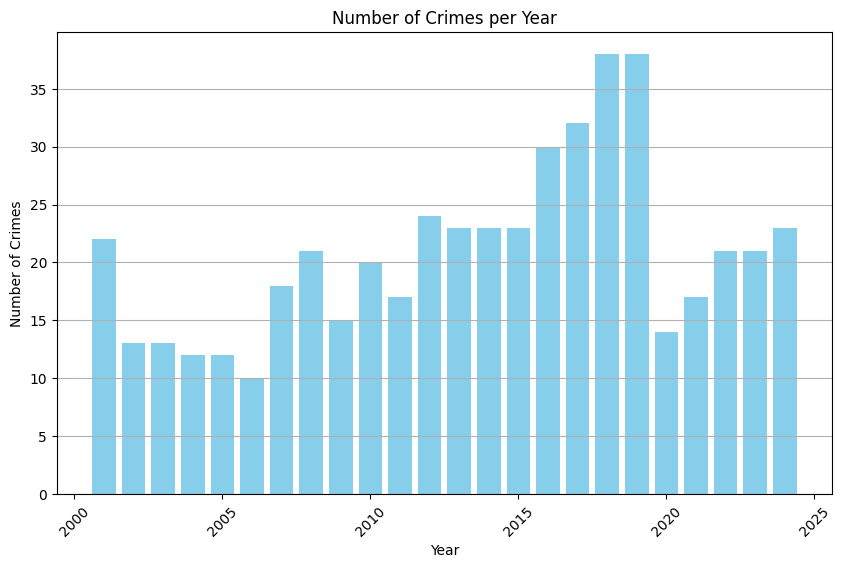

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Fetch the data from the database
crime_data = %sql SELECT year, COUNT(case_number) AS crime_count FROM chicago_crime GROUP BY year ORDER BY year;

# Convert the results to a pandas DataFrame
crime_df = pd.DataFrame(crime_data)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(crime_df['year'], crime_df['crime_count'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


- Trend Over Time: The number of crimes shows an overall increasing trend from around 2000 to 2020, with fluctuations in certain years.

- Peak Years: The highest number of crimes occurred in 2018 and 2019, indicating a significant spike in criminal activity that year.

- Low Points: There were noticeable low points in the number of crimes around the years 2002 to 2006 with 2006 with the lowest, suggesting possible successful interventions or changes in law enforcement strategies during those periods.

- Stability in Recent Years: After 2020, the number of crimes appears to stabilize but remains relatively high.

# 5. Which year had the most number of crimes leading to an arrest? How many arrests were made during that year? Plot the trend for total number of arrests per year.

**2014 had the most number of crimes leading to an arrest of 15**

In [18]:
%%sql
SELECT year,
COUNT(arrest) AS number_of_arrest,
COUNT(case_number) AS number_of_crimes
FROM chicago_crime
WHERE arrest = 1
GROUP BY year
ORDER BY number_of_crimes DESC;


 * sqlite:///chicago_crime.db
Done.


year,number_of_arrest,number_of_crimes
2014,15,15
2017,11,11
2012,10,10
2024,9,9
2023,8,8
2019,8,8
2016,8,8
2013,8,8
2015,6,6
2022,5,5


 * sqlite:///chicago_crime.db
Done.


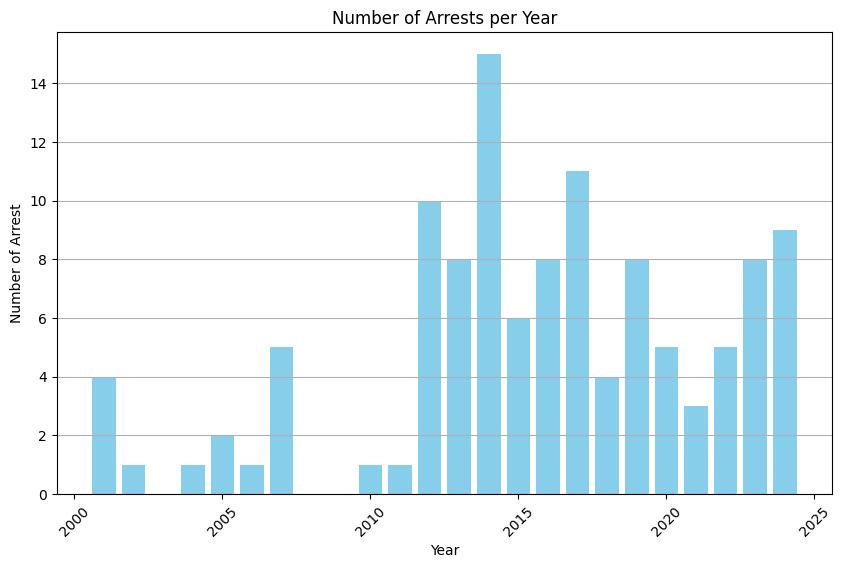

In [19]:
# Fetch the data from the database
arrest_per_year_data = %sql SELECT year,COUNT(arrest) AS number_of_arrest,COUNT(case_number) AS number_of_crimes FROM chicago_crime WHERE arrest = 1 GROUP BY year ORDER BY number_of_crimes DESC;

# Convert the results to a pandas DataFrame
arrest_df = pd.DataFrame(arrest_per_year_data)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(arrest_df['year'], arrest_df['number_of_arrest'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Arrest')
plt.title('Number of Arrests per Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Increasing Trend and Fluctuations:** There is an overall increase in the number of arrests from 2010 to around 2015, peaking at over 14 arrests in 2014. However, after 2015, there are visible fluctuations with a slight decline in some years, followed by a rise again after 2020.

**Post-2015 Decline and Recovery:** The noticeable dip after 2015 could be linked to social changes, policy shifts, or police reforms in Chicago, but the upward trend after 2020 might reflect an increase in enforcement or changes in crime rates post-pandemic.

- The arrest rates show a sharp drop from 2014 to 2015 and a significant rise from 2011 to 2012, indicating major shifts between these years.

- This pattern suggests that factors such as policy changes, socio-economic conditions, or public safety measures could have influenced the number of arrests across these years. Further analysis would be needed to determine specific causes for these fluctuations.